# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
###### Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units= "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger-
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | cabedelo
Processing Record 4 of Set 1 | arar
Processing Record 5 of Set 1 | rafah
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | dali
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | oranjemund
Processing Record 15 of Set 1 | st. john's
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | keflavik
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | mugia
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | arteche
Processing Record 23 of Set 1

In [19]:
### Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,28.92,54,40,4.12,US,1724609352
1,olonkinbyen,70.9221,-8.7187,3.40,96,100,11.56,SJ,1724609366
2,cabedelo,-6.9811,-34.8339,28.37,71,38,8.54,BR,1724609094
3,arar,30.9753,41.0381,38.01,13,0,0.00,SA,1724609369
4,rafah,31.2870,34.2595,28.38,67,0,4.19,PS,1724609370


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,28.92,54,40,4.12,US,1724609352
1,olonkinbyen,70.9221,-8.7187,3.40,96,100,11.56,SJ,1724609366
2,cabedelo,-6.9811,-34.8339,28.37,71,38,8.54,BR,1724609094
3,arar,30.9753,41.0381,38.01,13,0,0.00,SA,1724609369
4,rafah,31.2870,34.2595,28.38,67,0,4.19,PS,1724609370


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

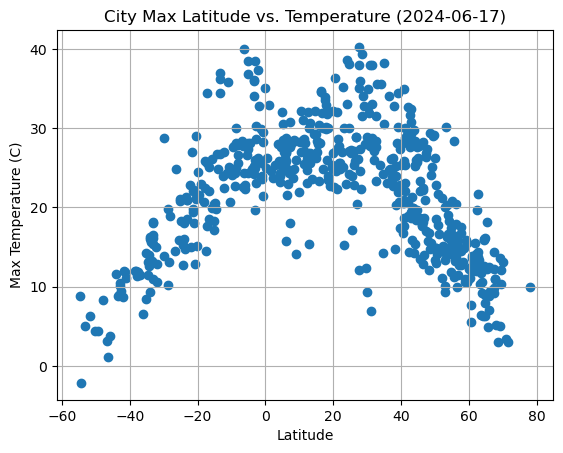

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

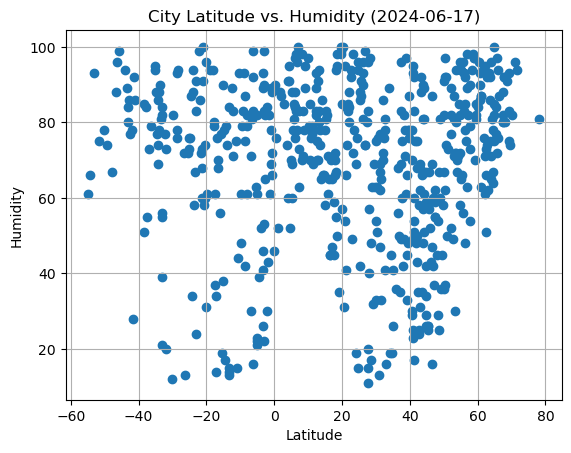

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

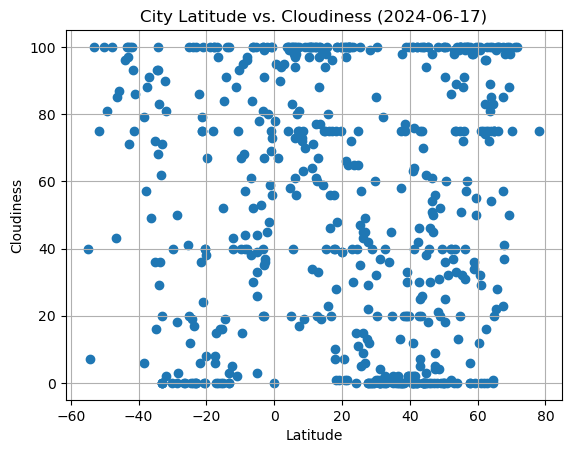

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

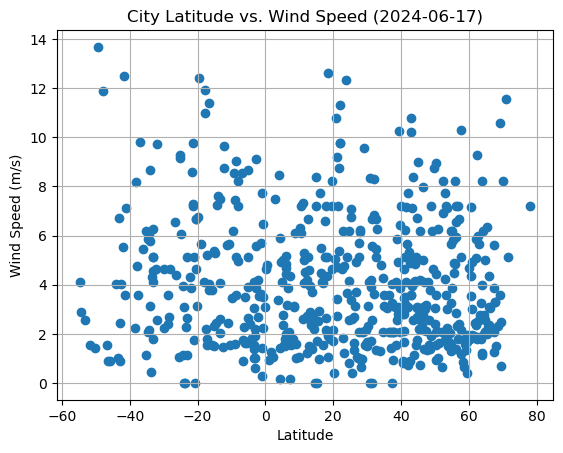

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots

def linear_regression(x_values, y_values, title, x_label, y_label):
   (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
#Regression values and plots
   regress_values = x_values * slope + intercept
   line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
   print(line_eq)
   plt.scatter(x_values,y_values)
   plt.plot(x_values,regress_values,"r-")
#Line equation
   plt.annotate(line_eq,(20, 15),fontsize=15,color="red")
#Labels
   plt.title(title)
   plt.xlabel(x_label)
   plt.ylabel(y_label)

   print(f"The r^2-value is: {rvalue**2}")
   print(f" The r rvalue is: {rvalue}")
   plt.show()
    


In [79]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]>0),:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,28.92,54,40,4.12,US,1724609352
1,olonkinbyen,70.9221,-8.7187,3.40,96,100,11.56,SJ,1724609366
3,arar,30.9753,41.0381,38.01,13,0,0.00,SA,1724609369
4,rafah,31.2870,34.2595,28.38,67,0,4.19,PS,1724609370
5,badger,64.8000,-147.5333,7.93,82,75,2.06,US,1724609371


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]<0),:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,cabedelo,-6.9811,-34.8339,28.37,71,38,8.54,BR,1724609094
8,port-aux-francais,-49.3500,70.2167,4.44,74,81,13.68,TF,1724609375
9,grytviken,-54.2811,-36.5092,-2.13,66,7,2.87,GS,1724609376
11,adamstown,-25.0660,-130.1015,20.82,76,100,9.14,PN,1724609378
12,port elizabeth,-33.9180,25.5701,16.29,88,29,3.13,ZA,1724609379


###  Temperature vs. Latitude Linear Regression Plot

y = -0.28x +32.57
The r^2-value is: 0.4651263228035373
 The r rvalue is: -0.6820017029330185


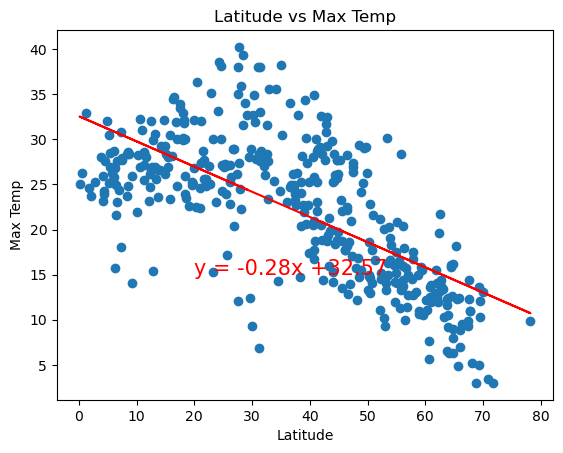

In [81]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"] , "Latitude vs Max Temp", "Latitude", "Max Temp")


y = 0.5x +30.79
The r^2-value is: 0.723562631466801
 The r rvalue is: 0.8506248476659972


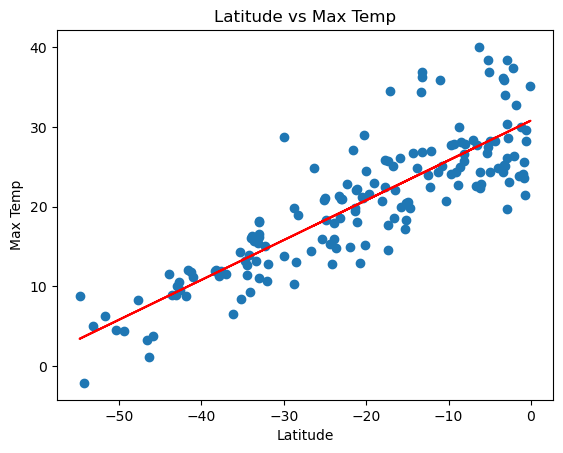

In [82]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"] , "Latitude vs Max Temp", "Latitude", "Max Temp")

**Discussion about the linear relationship:** Northern hemisphere: Strong negative correlation between Latitude and Max Temperature 
Southern Hemisphere: Strong positive correlation between Latitude and Max Temperature 

### Humidity vs. Latitude Linear Regression Plot

y = -0.0x +70.13
The r^2-value is: 1.0690495037127863e-05
 The r rvalue is: -0.003269632247994851


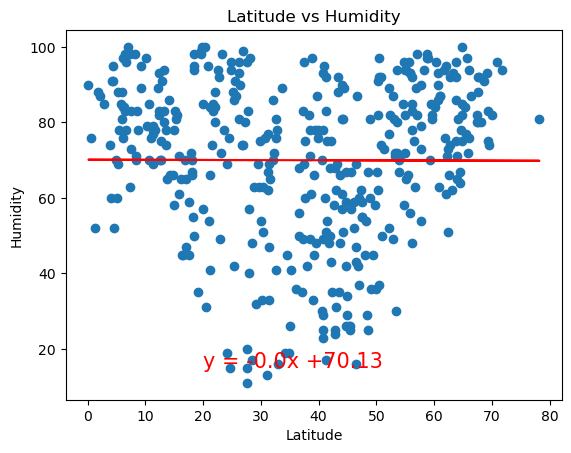

In [83]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"] , "Latitude vs Humidity", "Latitude", "Humidity")

y = -0.36x +60.26
The r^2-value is: 0.04638070926336638
-0.21536181013208072


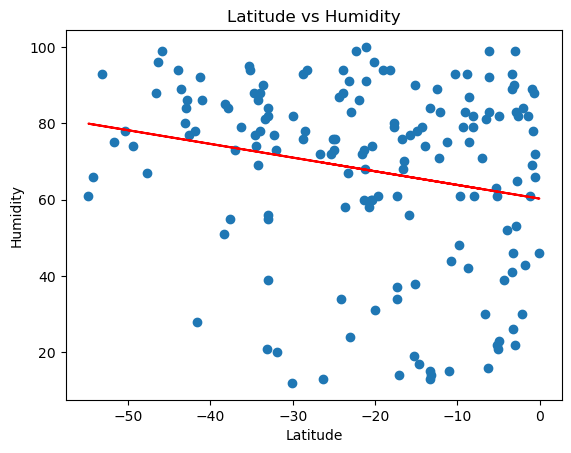

In [75]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"] , "Latitude vs Humidity", "Latitude", "Humidity")

**Discussion about the linear relationship:** Northern hemisphere: Very weak negative correlation between Latitude and Humidity
Southern Hemisphere: Very weak negative correlation between Latitude and Humidity

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.16x +58.24
The r^2-value is: 0.006522388724418278
 The r rvalue is: -0.08076130709949089


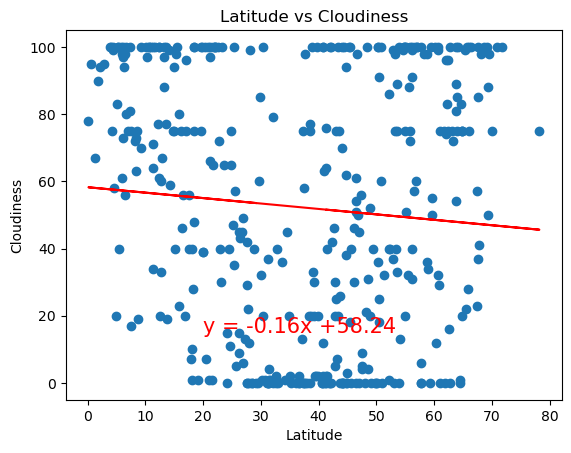

In [84]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"] , "Latitude vs Cloudiness", "Latitude", "Cloudiness")

y = -0.15x +49.71
The r^2-value is: 0.0035049355521202885
 The r rvalue is: -0.05920249616460685


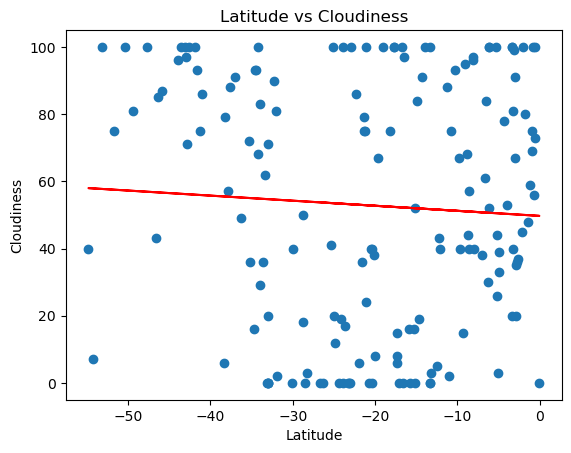

In [85]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"] , "Latitude vs Cloudiness", "Latitude", "Cloudiness")

**Discussion about the linear relationship:** Northern hemisphere: Very weak negative correlation between Latitude and Cloudiness
Southern Hemisphere: Very weak negative correlation between Latitude and Cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.0x +3.76
The r^2-value is: 0.00013924888792554433
 The r rvalue is: 0.011800376601004916


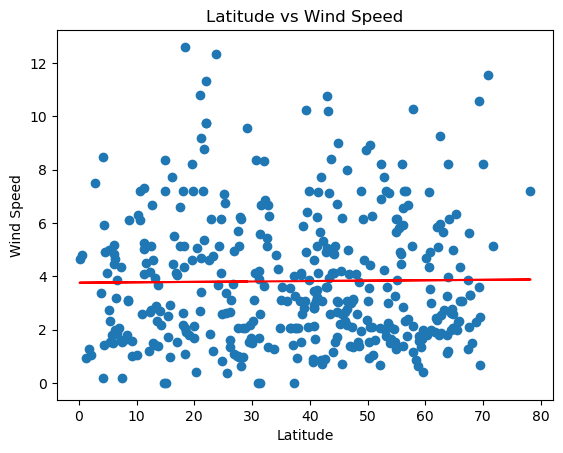

In [86]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"] , "Latitude vs Wind Speed", "Latitude", "Wind Speed")

y = -0.02x +4.1
The r^2-value is: 0.0059176957900388735
 The r rvalue is: -0.07692656101788818


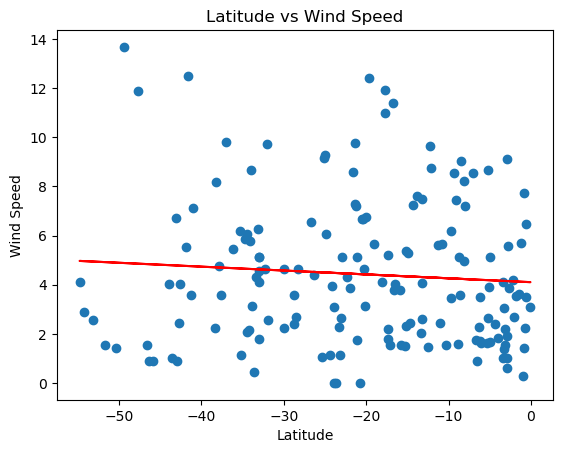

In [87]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"] , "Latitude vs Wind Speed", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** Northern hemisphere: Very weak positive correlation between Latitude and Wind Speed
Southern Hemisphere: Very weak negative correlation between Latitude and Wind Speed